# K-Nearest Neighbors Regression/Classification & Model Evaluations 
- Ch.3 의 KNN-Regression과
- Ch.4 의 KNN-Classification을 scikit-learn 라이브러리를 이용해 실습
- Regression 모델 평가에 **Mean Absolute Error**(MAE), **Mean Squared Error**(MSE), **RMSE** (Root MSE)들을 사용
- Classification 모델 평가에 **Confusion Matrix**, **ROC 커브**, **AUC** 등

In [1]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf      

# notebook에 직접 그래프를 plot  
%matplotlib inline

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/lee/Programs/anaconda3/envs/tensorflow_1.4/bin/python
3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


## 3장의 advertising 데이터를 활용해 Regression 연습 및 성능/에러 평가
### 목표 : 광고비를 통해 매출을 예측할 수 있는지?

In [3]:
advertising = pd.read_csv('../Data/Advertising.csv', usecols=[1,2,3,4])   
advertising.head()    

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


## Regression 모델 평가에 흔히 쓰이는 측정치 (metric): 에러를 측정하기에 작은 값이 좋음

- **Mean Absolute Error** (MAE) 는 에러 절대값들의 평균 
$$ \frac 1n\sum_{i=1}^n|y_i - \hat{y}_i| $$


- **Mean Squared Error** (MSE) 는 에러 제곱들의 평균
$$ \frac 1n\sum_{i=1}^n(y_i - \hat{y}_i)^2 $$


- **Root Mean Squared Error** (RMSE) 는 MSE의 제곱근 (root-MSE)
$$ \sqrt{\frac 1n\sum_{i=1}^n(y_i - \hat{y}_i)^2} $$


## scikit-learn의 'LinearRegression' estimator를 적용하여 Sales 예측 : Training Performance

In [5]:
from sklearn.linear_model import LinearRegression

X = advertising.loc[:, :'Newspaper']
y = advertising.Sales

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
X.head(4)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5


In [7]:
# MAE, MSE, RMSE 수작업 계산 
y_hat = lr.predict(X)   # y_hat : estimated(predicted) y 
errors = y - y_hat
MAE = np.absolute(errors).mean()
MSE = np.square(errors).mean()
RMSE = np.sqrt(MSE)

print ("The MAE is: {:.3}".format(MAE) )  
print ("The MSE is: {:.3}".format(MSE) )
print ("The RMSE is: {:.3}".format(RMSE) )

The MAE is: 1.25
The MSE is: 2.78
The RMSE is: 1.67


### scikit-learn의 metrics 모듈을 이용하여 MAE, MSE, RMSE 계산 : 

In [8]:
from sklearn import metrics
print ("The MAE is: %.2f" % ( metrics.mean_absolute_error(y, y_hat) )  )  # (True, Predict) 순서  
print ("The MSE is: {:.3}".format( metrics.mean_squared_error(y, y_hat) )  )
print ("The RMSE is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat)))) # metrics 모듈이 RSME 직접 제공 안함 

The MAE is: 1.25
The MSE is: 2.78
The RMSE is: 1.67


### statsmodels Linear Regression 복습 :

In [9]:
lr_stats = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()
print ("The MAE is: {:.3}".format( metrics.mean_absolute_error(y, lr_stats.predict(X)) )  )  # (True, Predict) 순서  
print ("The MSE is: {:.3}".format( metrics.mean_squared_error(y, lr_stats.predict(X)) )  )
print ("The RMSE is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, lr_stats.predict(X)))))

The MAE is: 1.25
The MSE is: 2.78
The RMSE is: 1.67


# [KNN regression](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- ISLR. 3장 후반부 참고
- KNN regression의 predicted response는 predict 하려는 샘플에서 가장 가까운 K 이웃 response 들의 평균 
- Non-parametric 모델

### Import, Instantiate, fit, predict
- 데이터로 앞의 linear regression에서 쓴 'advertising' 을 사용 

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5, n_jobs= -1)  # n_neighbors : K 
knn_reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
          weights='uniform')

### advertising 데이터에 대한 knn-regressor의 Training Performance : K=5

In [11]:
y_hat = knn_reg.predict(X)    # training performance
print ("The MAE (KNN, K=5) is: {:.3}".format( metrics.mean_absolute_error(y, y_hat) )  )  # (True, Predict) 순서  
print ("The MSE (KNN, K=5) is: {:.3}".format( metrics.mean_squared_error(y, y_hat) )  )
print ("The RMSE (KNN, K=5) is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat)))) # metrics 모듈이 RSME 직접 제공 안함 

The MAE (KNN, K=5) is: 0.803
The MSE (KNN, K=5) is: 1.27
The RMSE (KNN, K=5) is: 1.13


### advertising 데이터에 대한 knn-regressor의 Training Performance : K=3

In [12]:
knn_reg = KNeighborsRegressor(n_neighbors=3, n_jobs= -1)  # n_neighbors : K = 3 
knn_reg.fit(X, y)
y_hat = knn_reg.predict(X)
print ("The MAE (KNN, K=3) is: {:.3}".format( metrics.mean_absolute_error(y, y_hat) )  )  # (True, Predict) 순서  
print ("The MSE (KNN, K=3) is: {:.3}".format( metrics.mean_squared_error(y, y_hat) )  )
print ("The RMSE (KNN, K=3) is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat)))) # metrics 모듈이 RSME 직접 제공 안함 

The MAE (KNN, K=3) is: 0.671
The MSE (KNN, K=3) is: 0.866
The RMSE (KNN, K=3) is: 0.931


### advertising 데이터에 대한 knn-regressor의 Training Performance : K=11

In [13]:
knn_reg = KNeighborsRegressor(n_neighbors=11, n_jobs= -1)  
knn_reg.fit(X, y)
y_hat = knn_reg.predict(X)
print ("The MAE (KNN, K=11) is: {:.3}".format( metrics.mean_absolute_error(y, y_hat) )  )  # (True, Predict) 순서  
print ("The MSE (KNN, K=11) is: {:.3}".format( metrics.mean_squared_error(y, y_hat) )  )
print ("The RMSE (KNN, K=11) is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat)))) # metrics 모듈이 RSME 직접 제공 안함 

The MAE (KNN, K=11) is: 1.1
The MSE (KNN, K=11) is: 2.25
The RMSE (KNN, K=11) is: 1.5


#### KNN Regressor의 Training Performance는 K가 작을수록 좋다 (MAE/RMSE 값이 작아진다) 
- 앞의 linear regression과 RMSE로 비교하면, KNN regressor가 K=3 일 경우에 0.931, Linear Regression은 1.67. 
- K=11이면 그리 high-variance가 아닐 것 같아 Test performance도 괜찮을 것 같아 보이기에 이 advertising 데이터에 대해선 KNN-regressor가 Linear Regressor 보다 나아 보이는 것 같은데...  정말 그럴까? 

# [KNN-Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- scikit-learn 라이브러리를 이용한 KNN Classification
- ISLR 4.6.6 An Application to Caravan Insurance Data를 분석 대상으로 삼음
- Confusion matrix, ROC, AUC 등 일반적인 Classification Performance metric들을 익힌다

### 4.6.6 An Application to Caravan Insurance Data

### [Caravan 데이터](http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html) :
The data contains 5822 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. The **response Variable 86 (Purchase)** indicates whether the customer purchased a caravan insurance policy. In this data set, only 6 % of people purchased caravan insurance. Further information on the individual variables can be obtained at http://www.liacs.nl/~putten/library/cc2000/data.html
### 목표 : 고객들의 인구사회적 데이터를 분석해 보험에 가입할 지를 예측

In [14]:
Caravan = pd.read_csv('../Data/Caravan.csv', index_col=0)

In [15]:
Caravan.shape

(5822, 86)

In [16]:
# Caravan.info()
Caravan.tail()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
5818,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No
5822,33,1,3,3,8,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,No


In [17]:
Caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

### Import the KNN Classifier 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X = Caravan.drop(['Purchase'], axis=1)
y = Caravan.Purchase

#### [Standardize the X](http://scikit-learn.org/stable/modules/preprocessing.html)

In [20]:
from sklearn import preprocessing 
X_scaled = preprocessing.scale(X) 
X_scaled.std(axis=0)     # 확인 

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [21]:
pd.DataFrame(X_scaled, columns=X.columns).head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [22]:
# Train/Test Split 방법으로 성능 평가. Split 방법은 ISLR 내용대로 
# from sklearn.cross_validation import train_test_split
# Response인 y를 dummy encoding 하지 않았음.  
X_train = X_scaled[1000:,:]
y_train = y[1000:]

X_test = X_scaled[:1000,:]
y_test = y[:1000]

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)   # K=1
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)   # returns class label 
print("Test set error rate: ", (y_test != y_pred).mean() )    # manual calculatin

Test set error rate:  0.118


***Baseline accuracy/error_rate 계산:*** sample들의 response label 중에서 최대 다수의 label을 택했을 때의 경우이니, training set response 중에 최대 다수의 label을 보고 그 것을 택할 경우에 test set 에 대해 얼마나 맞추었는 지 보면 됨

In [24]:
def get_baseline_accuray(y_train, y_test):   # returns (baseline accuracy, label) tuple  
    majority_label = y_train.value_counts().idxmax()
    baseline_acc = y_test.value_counts()[ majority_label ] / len(y_test)
    return((baseline_acc, majority_label))

print("Test set baseline error rate = %s,  with the label = \'%s\'" % 
      (1 - get_baseline_accuray(y_train, y_test)[0], get_baseline_accuray(y_train, y_test)[1]))

Test set baseline error rate = 0.059,  with the label = 'No'


**Confusion Matrix와 [Classification Metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)** : KNN Classifier, K=1

In [25]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)   # argument 순이 (True, Predicted)  
print(conf_mat)

[[873  68]
 [ 50   9]]


In [26]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

# metrics function 을 사용할 수도 있음
# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Sensitivity: ", metrics.recall_score(y_test, y_pred) )
# print("Precision: ", metrics.precision_score(y_test, y_pred) )

Accuracy:  0.882
Sensitivity:  0.152542372881
Precision:  0.116883116883
False Positive Rate:  0.0722635494155


**Confusion Matrix** : KNN, K=5

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)   # K=5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

[[930  11]
 [ 55   4]]
Accuracy:  0.934
Sensitivity:  0.0677966101695
Precision:  0.266666666667
False Positive Rate:  0.0116896918172


### K를 변화시키면서 precision이 어떻게 변하는지 보자

In [28]:
k_range = range(1, 15)     # K=1, 2, .... , 14
precision_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)   
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf_mat = metrics.confusion_matrix(y_test, y_pred)
    TP = conf_mat[1,1]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    precision_scores.append(TP/(FP + TP))

list(zip(k_range, precision_scores))

/home/lee/Programs/anaconda3/envs/tensorflow_1.4/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


[(1, 0.11688311688311688),
 (2, 0.0),
 (3, 0.20000000000000001),
 (4, 0.0),
 (5, 0.26666666666666666),
 (6, 0.33333333333333331),
 (7, 0.2857142857142857),
 (8, nan),
 (9, 1.0),
 (10, nan),
 (11, nan),
 (12, nan),
 (13, nan),
 (14, nan)]

In [29]:
knn = KNeighborsClassifier(n_neighbors=6)   
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[939,   2],
       [ 58,   1]])

### 분석:
- K=6 일 때 precision이 최대로 커지는 것처럼 보인다. 그러면, K=6일 때의 confusion matrix를 보면, 모델이 단 3번 positive로 예측해서 그 중 1번 맞추었다. 실제로 purchase한 사람(positive)이 59명인데 그 중 1명만 식별한 것이다. Sensitivity가 1/59로 엉망이다. 이 경우 precision은 높아 졌지만 거의 의미가 없다고 할 수 있다.  

- K가 10 이상 일 때 precision 이 'nan'이 된다. K=12 경우를 아래에서 보면 모델이 아예 positive라 예측한 것이 전혀 없다. 따라서 분모가 0 이니 nan이 된다. Training set에서도 positive가 약 6% 밖에 되지 않는다. 따라서 K가 커지면서 positive 보다 negative가 이웃으로 더 많이 있게 된다. 때문에 negative가 K가 커질 수록 다수가 될 가능성이 높아지고, KNN이 positive라 할 가능성이 적어진다. K=12 일 때 KNN은 항상 negative만 부르고, sensitivity는 0 이 되었다. 이 예에서 보듯이 KNN은 K가 어느 이상되면 baseline 모델처럼 동작하게 됨을 짐작할 수 있다.   

In [30]:
knn = KNeighborsClassifier(n_neighbors=12)   
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[941,   0],
       [ 59,   0]])

## Using Logistic Regression Classifier:
### 1. Logistic Regression이나 KNN Classifier 같이 대다수의 Classifier는 Class 확률을 제공한다.  
### 2. Classifier는 Class 확률에 기본적으로 threshold = 0.5 를 적용하여 Class label을 정한다.
###  3. 아래 예와 같이 Logistic Regression의 threshold (probability cut-off) 를 변화시켜 class label 을 결정함에 변화를 줄 수 있다.
*** Caravan 예측 분석에서의 활용 : Classifier의 target (여기서는 'Purchase') 예측에 대한 민감도(senstitivy, recall)를 높이기 위해 threshold를 낮춘다 ***

In [31]:
from sklearn.linear_model import LogisticRegression 

In [32]:
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Threshold가 0.5 인 경우 
y_pred = log_reg.predict(X_test)  # returns class labels based on threshold=0.5

conf_mat = metrics.confusion_matrix(y_test, y_pred) ; conf_mat

array([[934,   7],
       [ 59,   0]])

In [34]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity(Recall): ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
# print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.934
Sensitivity(Recall):  0.0
Precision:  0.0
False Positive Rate:  0.00743889479277


- Accuracy는 좋다고 나오지만 실은 baseline보다 나을 것이 없고, ***sensitivity와 precision은 최악***. Positive를 하나도 식별하지 못했고 (sensitivity==0), positive라고 예측한 것이 7번 인데 그나마 그 중 맞춘 것은 하나도 없다 (precision==0).   
- Caravan 데이터에서 baseline precision 이나 random guessing precision이 6% 정도 

In [35]:
y_pred_prob = log_reg.predict_proba(X_test)   # returns prob of class labels
print(y_pred_prob[:10])
print(y_pred[:10])

[[ 0.90335716  0.09664284]
 [ 0.9887958   0.0112042 ]
 [ 0.94459523  0.05540477]
 [ 0.90114375  0.09885625]
 [ 0.9694977   0.0305023 ]
 [ 0.98236629  0.01763371]
 [ 0.96122422  0.03877578]
 [ 0.99183887  0.00816113]
 [ 0.96506227  0.03493773]
 [ 0.97840008  0.02159992]]
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


- 첫째 Column의 값이 0.5 이상이면 'No' (둘째 Column의 값이 0.5 이상이면 'Yes')
- 'No'가 0 으로, 'Yes'가 1 로 encoding 됭

### 둘째 column의 값이 0.25 이상이면 'Yes'를 하도록 하여 'Yes'에 좀 더 민감하도록 하면,

In [36]:
y_pred_sensitized = ['Yes' if prob>0.25 else 'No' for prob in y_pred_prob[:,1]]

In [37]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_sensitized) ; conf_mat


array([[917,  24],
       [ 48,  11]])

In [38]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity(Recall): ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

Accuracy:  0.928
Sensitivity(Recall):  0.186440677966
Precision:  0.314285714286
False Positive Rate:  0.0255047821467


** 분석 : Classification Test Performance based on Train/Test Procedure **


|             | threshold=0.5 | threshold=0.25 |
|-------------|---------------|----------------|
| Accuracy    | 0.934         | 0.928          |
| Sensitivity | 0             | 0.186          |
| Precision   | 0             | 0.314          |
| FPR         | 0.0074        | 0.025          |

1. logistic regression으로 학습시키고 threshold=0.5 하면: Accuracy는 0.934로 baseline null classifier와 비슷하고 반면에 sensitivity와 precision은 아예 0이 되어 baseline보다도 더 나쁜 결과
2.  logistic regression으로 학습시키고 threshold=0.25 하면: Accuracy는 0.928로 baseline보다 별 차이가 없고, 반면에 sensitivity와 precision이 매우 좋아짐. 모델이 59개의 positive (Purchase) 중 11개를 식별했고, 35번 Purchase를 예측했는데 그 중 11개를 맞추었음 (Precision == 0.314).    

# [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (Receiver Operating Characteristic) 커브 & AUC(Area Under an ROC Curve) 
- 2차 세계대전 중 레이더 엔지니어들의 고민 중 하나가 레이더 수신기(Radar Receiver)로 들어온 신호가 구름을, 새를, 적기를, 아군기를, UFO를 잡은 것인지 아니면 그냥 잡음인지 판단하는 것 
- 즉, 신호처리/분석을 스마트하게 해서 target 탐지(detection: 여러 물체가 있는데 그 중에 target이 있는지)을 잘 하는 문제. 이 문제를 Classification 으로 생각하는 법을 "detection as a classification problem" 이라고.
- 이 사람들은 그 당시까지의 estimation/detection theory, measurement 에 대한 이론/실무적용에 대한 전문가들
- Confusion matrix 같은 개념은 선사시대 동굴에 살던 우리 선조들도 잘 알고 있었고 실생활에 적용했음. 실은 ***개구리***도 선수 : 위협인 새를 놓치지 않고 잘 탐지해야 잡혀 먹히지 않고, 한편 너무 예민해 나비도 새로 잘 못 판단하면 굶어 죽음 
- Target의 식별/탐지가 매우 중요한데, 가령 타깃이 우리 몸의 암, 우리 머리에 폭탄 떨어뜨리려는 적 비행기일 때 이 를 놓치면 우리 건강과 복지에 매우 안 좋기에 가능한 놓치면 안됨.  
- 기본적으로, 목표물(Target, Positive Response) 탐지에 대한 예민함을 높이려고 (즉, 타깃을 놓치지 않으려고) 시스템이 Positive라 판단하는 기준을 낮추면 (즉, Positive에 대한 threshold를 낮추면), 대부분의 경우 False Positive Rate (타깃이 실제론 아닌데 타깃이라고 잘 못 예측/판단)도 같이 증가.  
- FPR이 높으면 그 시스템에 대한 신뢰 저하.  가령, 암진단 기계가 실제로 암이 아닌데 암이라고 자주 진단하면 그 장치 잘 안 믿을 것임. 이 문제는 공중에 있는 물체 중 적기인 비율, X선 사진 중 암이 있는 사진일 비율과 같이 실제 타깃 비율이 매우 작을 때 (즉, negative 비율이 매우 높을 때) 두드러짐.  
- 레이다 엔지니어의 고민은 최대한 타깃은 놓치지 않으면서 (Sensitivity가 높음), FPR이 낮은 시스템을 개발하던가, 또는 어떤 시스템에서 Sensitivity와 FPR 간에 적절한 포인트를 찾는 것
- ROC 커브는 어떤 튜닝 패러미터 (여기서는 threshold)를 변화하면서, 그 때 마다 sensitivity와 FPR을 그래프상에 표시한 것으로, 레이더 기술자들이 알고싶은 시스템 성능을 한 눈에 보기 쉽게 표시한 것
- Threshold가 작아지면서 TPR(sensitivity)과 FPR은 monotonically 증가함 
- ROC 커브가 원점에서 시작해 빨리 좌상단에 접근함은, threshold를 조금만 낮추어도 sensitivity가 급격히 높아지고 (좋아지고), FPR은 아직 그리 높아지지 않는 그런 threshold 포인트들이 있다는 것. 이 얘기는 해당 시스템이 좋다는 말
- AUC는 ROC 커브 모양을 하나의 숫자로 표현한 것으로, ROC 모양이 좋으면 (좌상단에 붙으면) 커브 아래의 면적이 1에 가까와지므로, 곧 AUC가 1에 근접할 수록 시스템의 성능이 좋다는 말. Binary Classifier의 성능을 간단히 나타낼 때 흔히 사용

## [ROC 커브](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)를 그려보자
- 앞에서 threshold값을 바꾸어가면서 보던 sensitivity와 FPR의 관계를 ROC로 보자

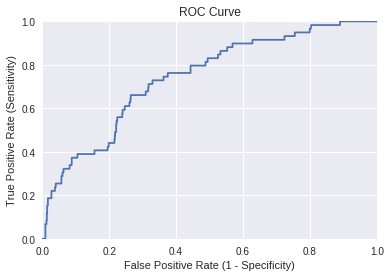

In [39]:
y_test_enc = y_test.map({'No':0, 'Yes':1})    # 필요 
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)


In [40]:
# 간단한 함수 
def get_TPR_FPR_given_Thd(threshold):   # return (sensitivity, FPR) tuple
    sensitivity_th = tpr[thresholds > threshold][-1]  
    fpr_th = fpr[thresholds > threshold][-1]
#    print(sensitivity_th, fpr_th)
    return (sensitivity_th, fpr_th)

def get_Threshold_given_TPR(sensitivity):
#    print(thresholds[tpr<sensitivity][-1])
    return (thresholds[tpr<sensitivity][-1] )

print("Threshold=0.05 일 때, sensitivity = %.3f, FPR = %.3f" % 
      (get_TPR_FPR_given_Thd(0.05)[0], get_TPR_FPR_given_Thd(0.05)[1]))
print("TPR=0.746 일 때, threshold = %.3f" % get_Threshold_given_TPR(0.746) )

Threshold=0.05 일 때, sensitivity = 0.746, FPR = 0.362
TPR=0.746 일 때, threshold = 0.050


## [AUC 계산](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [41]:
print(metrics.roc_auc_score(y_test_enc, y_pred_prob[:,1])) 

0.743430177057


In [42]:
# AUC 스코어를 Cross-Validation으로 구함.  시간 걸림 
# from sklearn.cross_validation import cross_val_score  # for scikit-learn < 0.18
from sklearn.model_selection import cross_val_score

y_enc = y.map({'No':0, 'Yes':1})   # needs it 
cross_val_score(log_reg, X, y_enc, cv=7, scoring='roc_auc').mean()

0.74084663679136253

In [43]:
print('exit 0')

exit 0
